In [1]:
import pandas as pd

### Reading the dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
file_path = "/content/drive/MyDrive/datafilesss/composition_with_thermodynamic_features (1).csv"

if os.path.exists(file_path):
    print("File exists ✅")
else:
    print("❌ Error: File not found!")

File exists ✅


In [11]:
# prompt: df,drop df['N']>1

import pandas as pd

# Assuming 'df' is already defined from the previous code block
# and the file exists.  If not, you need to load your dataframe first:
# df = pd.read_csv(file_path)

# Drop rows where 'N' is greater than 1
df = df[df['N'] <= 1]


In [6]:
df = pd.read_csv(file_path, )  # Change to an actual sheet name
print(df.head())  # Show first few rows

       Fe      C    Cr   Ni Mn    Si     N    Mo Co  P  ... Al Ti Ce Nb  \
0  68.504  0.016  22.2  5.7  0  0.44  0.16  2.98  0  0  ...  0  0  0  0   
1  68.504  0.016  22.2  5.7  0  0.44  0.16  2.98  0  0  ...  0  0  0  0   
2  68.504  0.016  22.2  5.7  0  0.44  0.16  2.98  0  0  ...  0  0  0  0   
3  68.504  0.016  22.2  5.7  0  0.44  0.16  2.98  0  0  ...  0  0  0  0   
4  68.504  0.016  22.2  5.7  0  0.44  0.16  2.98  0  0  ...  0  0  0  0   

  vol% sigma phase formed Temperature(c) Onset Time(hrs)       e_tot  \
0                     1.0          700.0             0.1 -509.775715   
1                     5.0          700.0             1.0 -393.224638   
2                    12.0          700.0             3.0 -469.354238   
3                    25.0          700.0             5.0 -492.143672   
4                    38.0          700.0            10.0 -445.141468   

       e_tot_eV   CNT_feature  
0 -3.182020e+21  1.465374e+22  
1 -2.454508e+21  1.130343e+22  
2 -2.929709e+21  1.3

In [12]:

print(df.shape)  # Check if data is loaded

(564, 23)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573 entries, 0 to 572
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Fe                       573 non-null    float64
 1   C                        573 non-null    object 
 2   Cr                       573 non-null    float64
 3   Ni                       573 non-null    object 
 4   Mn                       573 non-null    object 
 5   Si                       573 non-null    object 
 6   N                        573 non-null    object 
 7   Mo                       573 non-null    object 
 8   Co                       573 non-null    object 
 9   P                        573 non-null    object 
 10  S                        573 non-null    object 
 11  Cu                       573 non-null    object 
 12  W                        573 non-null    object 
 13  Al                       573 non-null    object 
 14  Ti                       5

In [10]:
# prompt: for col n df.columns convert df to numeric fill nan wit zero

for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        continue
    try:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    except Exception as e:
        print(f"Error converting column '{col}' to numeric: {e}")
    df[col] = df[col].fillna(0)


In [13]:
df['Temperature(c)'] = pd.to_numeric(df['Temperature(c)'], errors='coerce')
print(df['Temperature(c)'].dtype)

float64


### Number of datapoints in the dataframe 'df'

In [14]:
df.shape

(564, 23)

### Shuffling datapoints in dataset

In [15]:
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

### Checking if all datapoints are unique

In [13]:
duplicates = df.duplicated()

# To count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


In [93]:
# Remove duplicate rows and reset index
df = df.drop_duplicates().reset_index(drop=True)

### Counting number of null values in each of the columns

In [94]:
df.isnull().sum()

,0
Fe,0
C,0
Cr,0
Ni,0
Mn,0
Si,0
N,0
Mo,0
Co,0
P,0


need change object type to numerical

### Replacing null values with:
### 1. 0.05 in case of P and S
### 2. 0 in case of Fe, Cr, Ni, Mn, Si
### 3. Median for all other elements (I grouped the datapoints based on 'Type' and then found medians for each of the groups)

In [16]:
df['P'].fillna(0.05, inplace=True)
df['S'].fillna(0.05, inplace=True)

df['Fe'].fillna(0, inplace=True)
df['Cr'].fillna(0, inplace=True)
df['Ni'].fillna(0, inplace=True)
df['Si'].fillna(0, inplace=True)
df['Mn'].fillna(0, inplace=True)

<ipython-input-16-b0bb253420b4>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['P'].fillna(0.05, inplace=True)
<ipython-input-16-b0bb253420b4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({

In [16]:
import numpy as np
df.replace(' ', np.nan, inplace=True)

In [96]:
df.isnull().sum()

,0
Fe,0
C,0
Cr,0
Ni,0
Mn,0
Si,0
N,0
Mo,0
Co,0
P,0


In [17]:
# prompt: for columns in df fill nan wit 0

# Fill NaN values with 0 for all columns in the DataFrame
df.fillna(0, inplace=True)


In [18]:
df.isnull().sum()

,0
Fe,0
C,0
Cr,0
Ni,0
Mn,0
Si,0
N,0
Mo,0
Co,0
P,0


In [19]:
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Remove spaces
df = df.replace('\xa0', '', regex=True)  # Remove non-breaking spaces
df.replace('', np.nan, inplace=True)

<ipython-input-19-48f5a4c7d671>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)  # Remove spaces


### Normalizing composition columns (Horizontal Normalization)

In [20]:
# Normalizing rows so their sum equals 100
composition_columns = ['Fe',	'C',	'Cr',	'Ni',	'Mn',	'Si',	'N',	'Mo',	'Co',	'P',	'S',	'Cu',	'W',	'Al',	'Ti',	'Ce']
df[composition_columns] = df[composition_columns].div(df[composition_columns].sum(axis=1),axis=0)*100

### Min Max Scaling for entire dataset (Vertical Normalization)

In [21]:
from sklearn.preprocessing import MinMaxScaler

# Drop 'Type' column (categorical)
df_dropped = df.drop(columns=['e_tot','e_tot_eV'])
for col in df_dropped.select_dtypes(include=['object']).columns:
    df_dropped[col] = pd.to_numeric(df_dropped[col].str.replace('[^0-9.]', '', regex=True), errors='coerce').fillna(0.01)

# Separate features and target
feature_cols = df_dropped.drop(columns=['Onset Time(hrs)']).columns.tolist()
target_col = 'Onset Time(hrs)'

# Initialize two scalers
scaler_X = MinMaxScaler(feature_range=(0, 1))
scaler_y = MinMaxScaler(feature_range=(0, 1))

# Fit and transform features
df[feature_cols] = scaler_X.fit_transform(df[feature_cols])

# Fit and transform target separately
df[[target_col]] = scaler_y.fit_transform(df[[target_col]])


In [ ]:
# prompt: perform minmax scaling to df

# Code to perform minmax scaling is already present in the provided code.
# No further code is needed to perform minmax scaling.
# If you want to apply min-max scaling to a different set of columns or with different parameters, you can modify the existing code accordingly.

# Example: Scaling only composition columns with different feature range:
# composition_columns = ['Fe',	'C',	'Cr',	'Ni',	'Mn',	'Si',	'N',	'Mo',	'Co',	'P',	'S',	'Cu',	'W',	'Al',	'Ti',	'Ce']
# scaler_comp = MinMaxScaler(feature_range=(-1, 1)) # Different feature range
# df[composition_columns] = scaler_comp.fit_transform(df[composition_columns])


### Correlation Matrix

In [53]:
# prompt: convert df to numerics

# Assuming 'df' is your DataFrame

# Iterate through all columns
for col in df.columns:
    # Attempt to convert to numeric, coercing errors to NaN
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill NaN values with 0 (or another appropriate value)
df.fillna(0, inplace=True)


<ipython-input-53-4fdb74d4b767>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = pd.to_numeric(df[col], errors='coerce')
<ipython-input-53-4fdb74d4b767>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna(0, inplace=True)


In [101]:
df.dtypes

,0
Fe,float64
C,float64
Cr,float64
Ni,float64
Mn,float64
Si,float64
N,float64
Mo,float64
Co,float64
P,float64


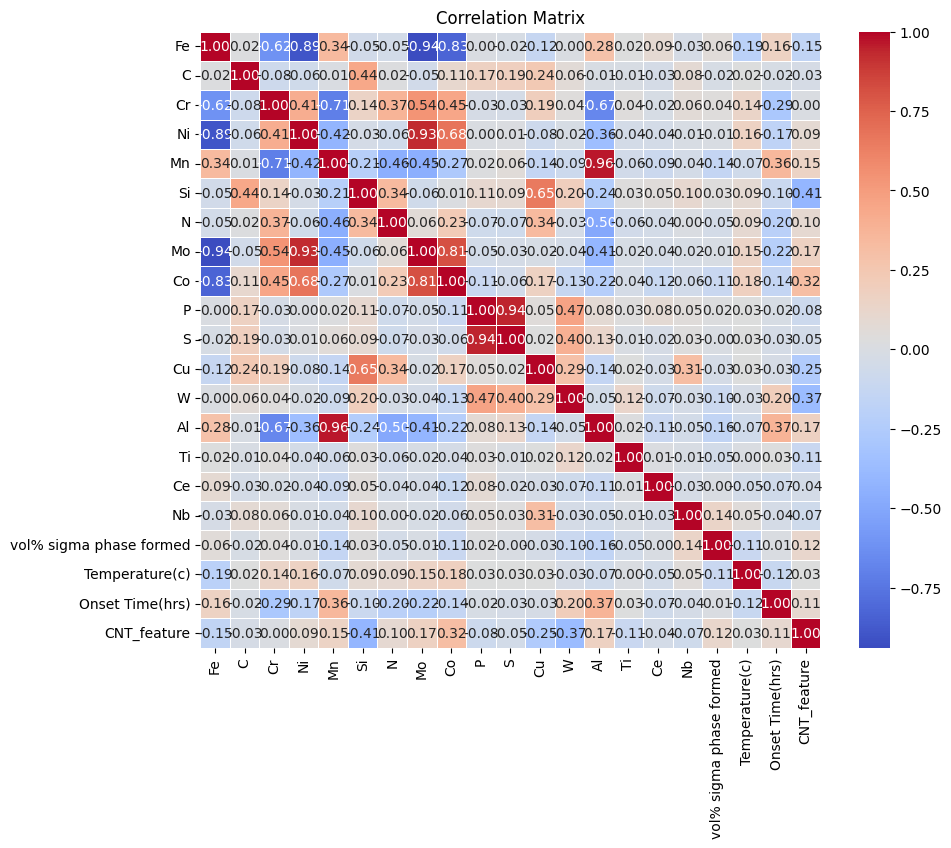

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the column 'Type' from the dataset while plotting correlation matrix
df_dropped = df.drop(columns=['e_tot','e_tot_eV'])
correlation_matrix = df_dropped.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

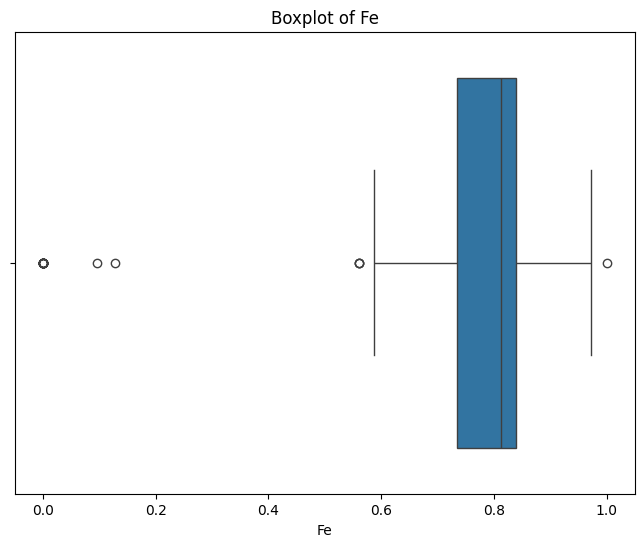

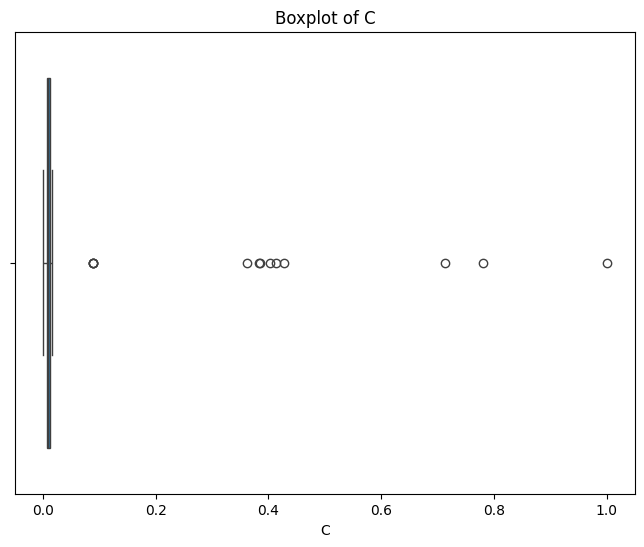

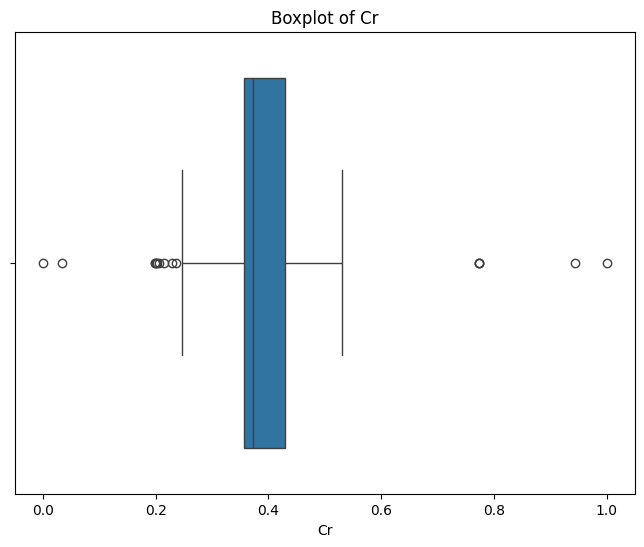

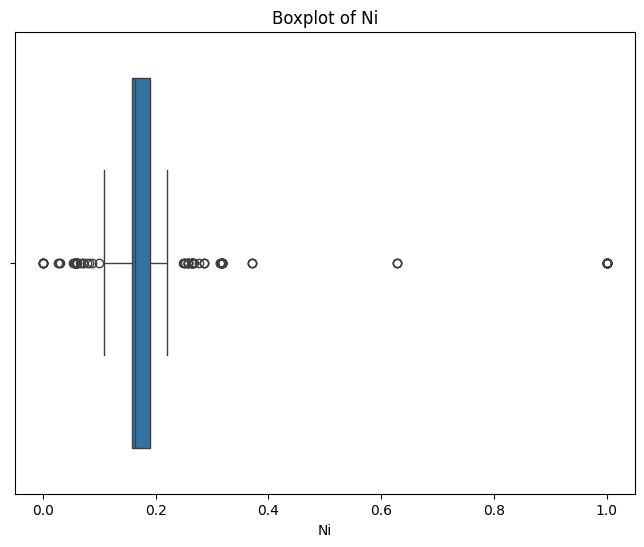

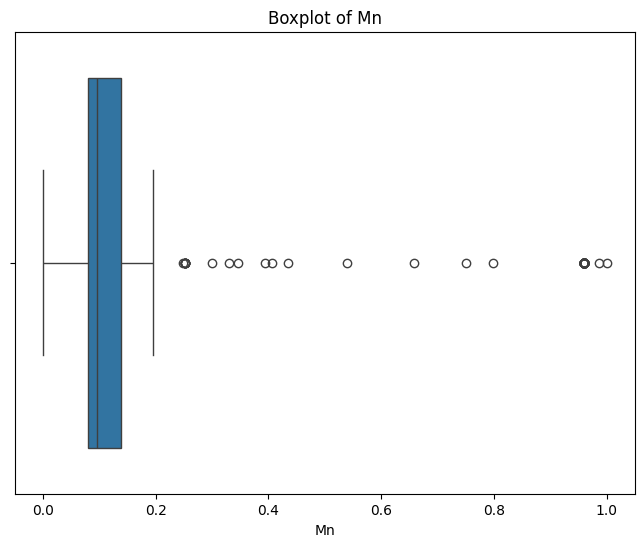

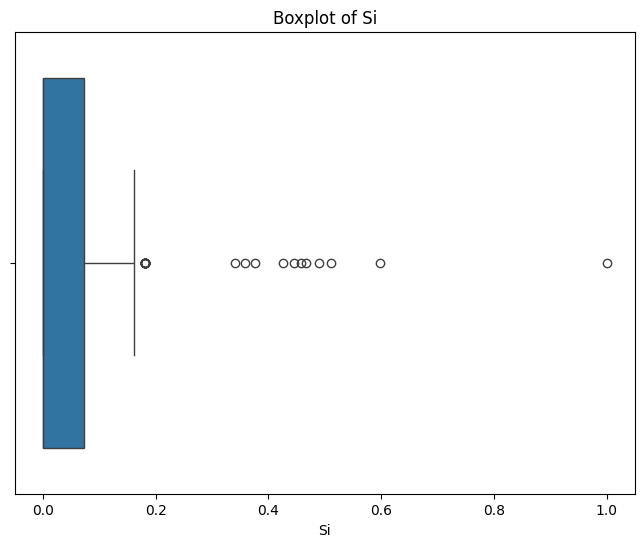

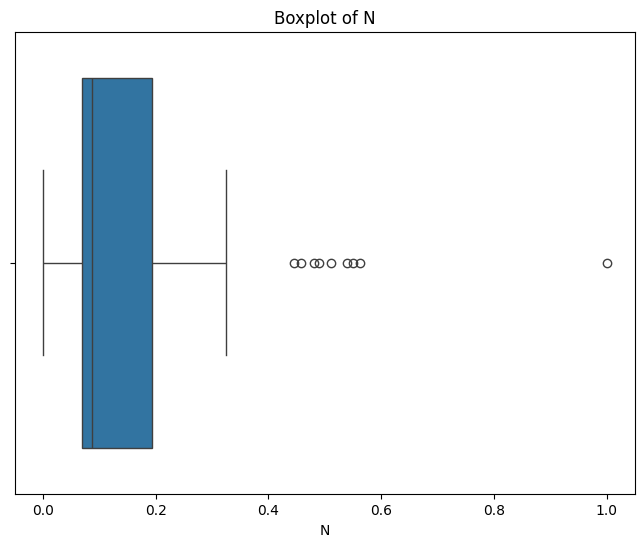

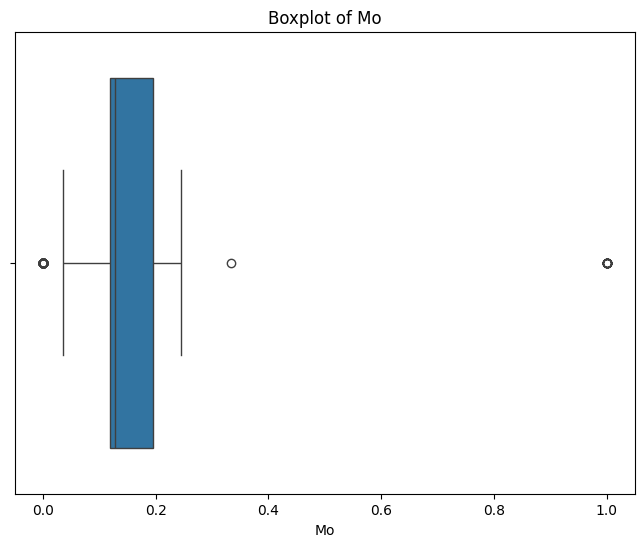

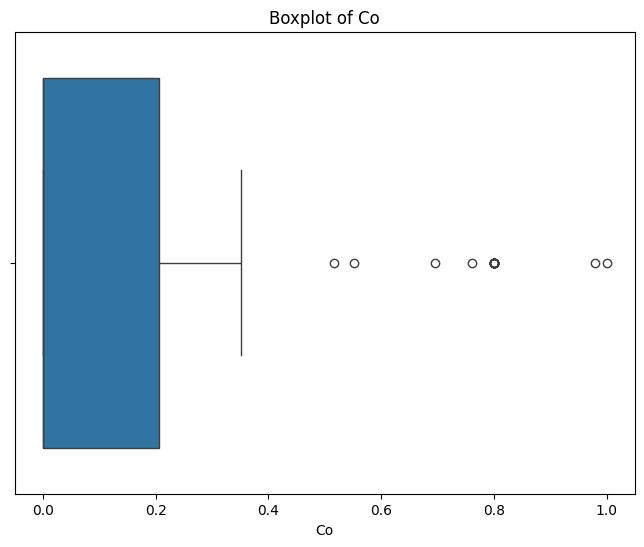

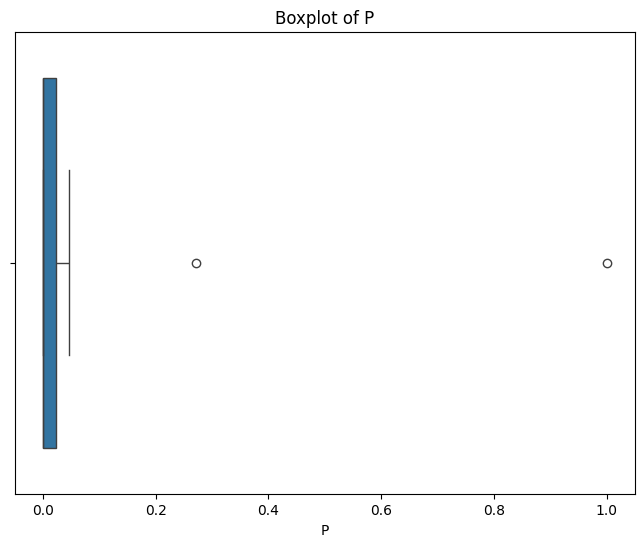

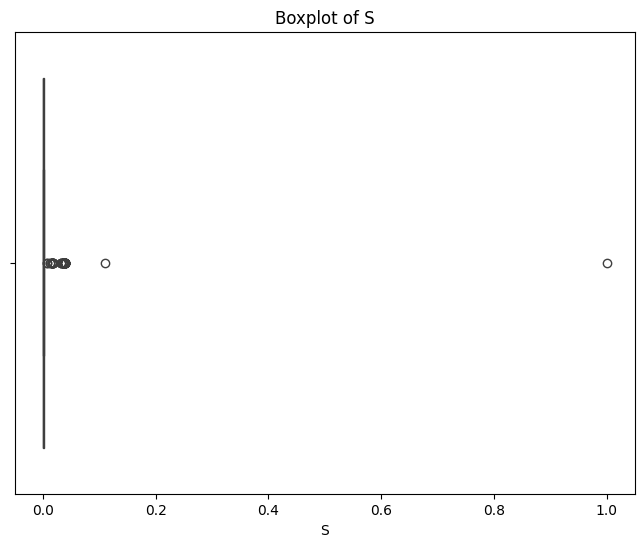

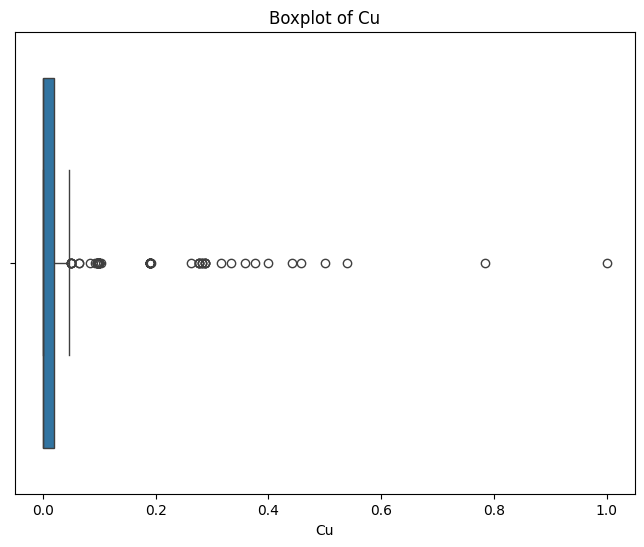

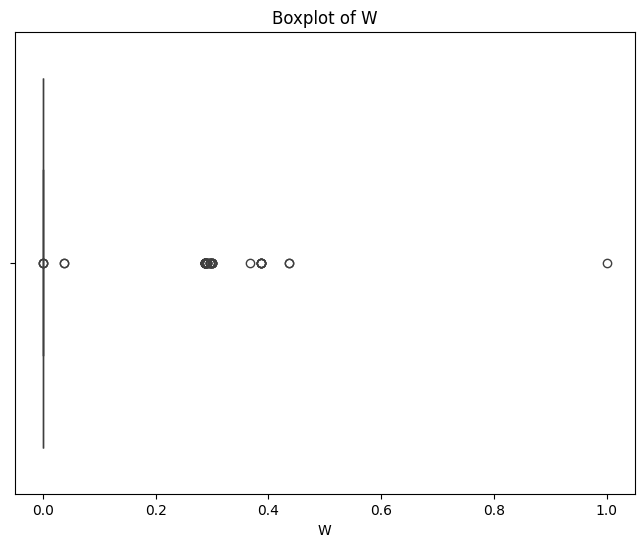

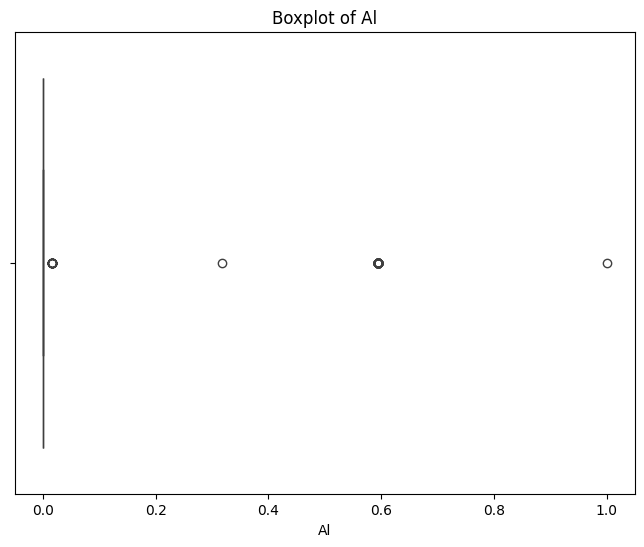

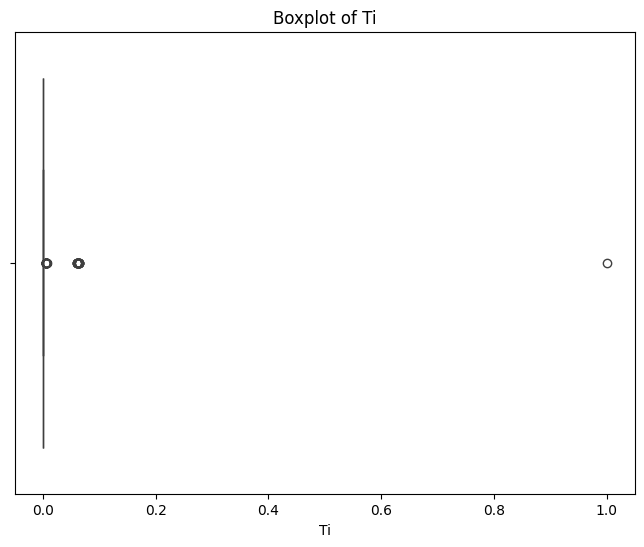

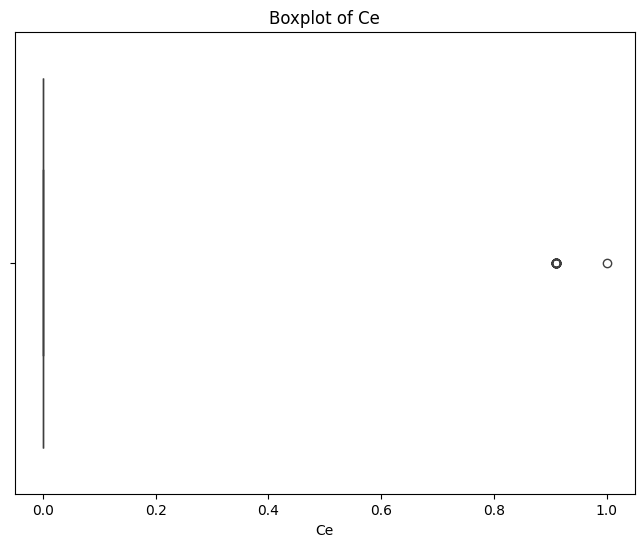

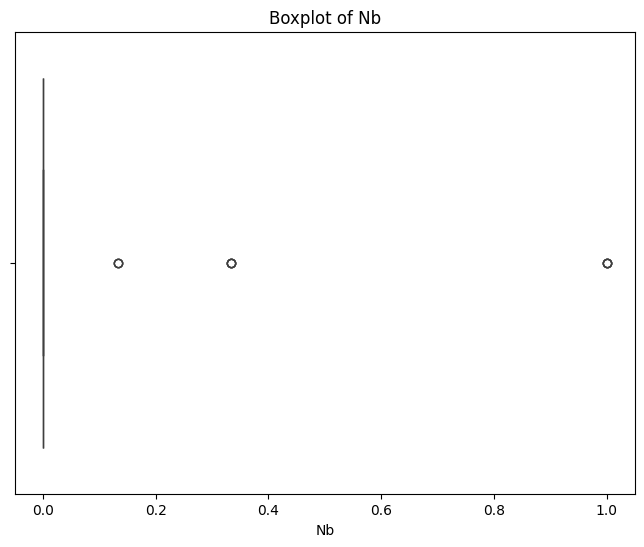

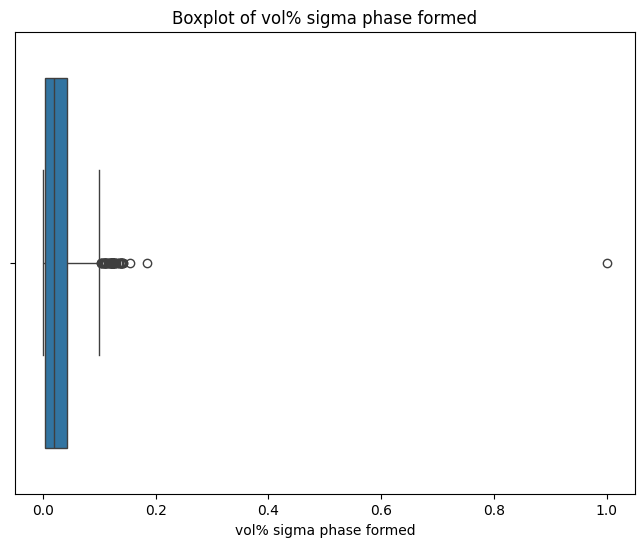

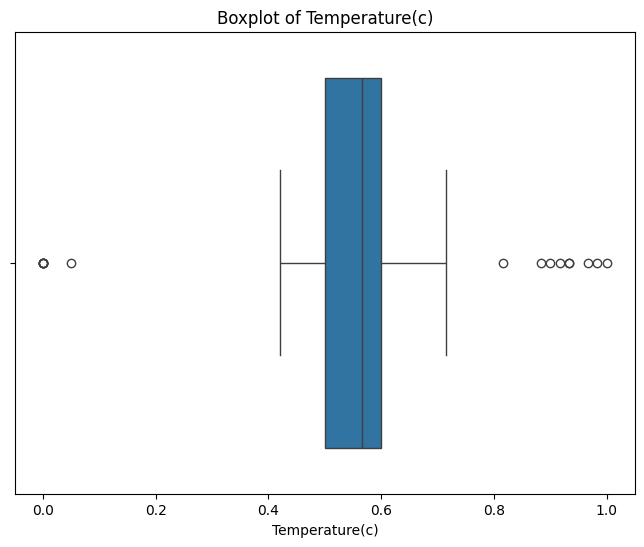

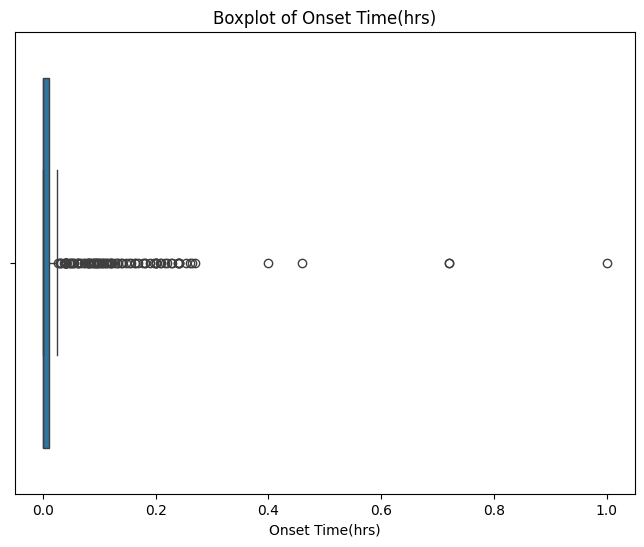

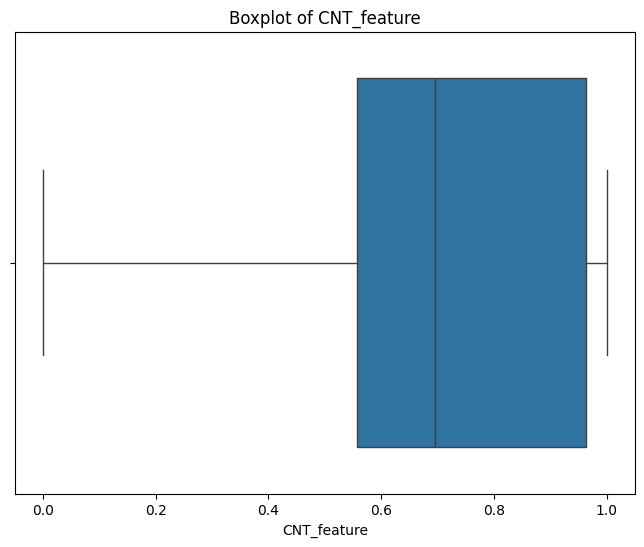

In [23]:
# prompt: for col in df_dropped boxplot

# Assuming df_dropped is your DataFrame after dropping columns
for col in df_dropped.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df_dropped[col])
  plt.title(f'Boxplot of {col}')
  plt.show()


In [24]:
df_dropped['logt']=np.log(df_dropped['Onset Time(hrs)'])

/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [25]:
df_dropped.head()

,Fe,C,Cr,Ni,Mn,Si,N,Mo,Co,P,...,W,Al,Ti,Ce,Nb,vol% sigma phase formed,Temperature(c),Onset Time(hrs),CNT_feature,logt
0,0.859614,0.00820,0.247597,0.058286,0.959240,0.000000,0.0000,0.000000,0.0,0.0,...,0.0,0.594122,0.0,0.0,0.0,0.022775,0.500000,0.215550,0.965231,-1.534562
1,0.859614,0.00820,0.247597,0.058286,0.959240,0.000000,0.0000,0.000000,0.0,0.0,...,0.0,0.594122,0.0,0.0,0.0,0.016900,0.600000,0.094766,0.965190,-2.356345
2,0.873862,1.00000,0.215180,0.174216,0.000000,0.597561,0.0000,0.146341,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.007500,0.596667,0.020000,0.575092,-3.912023
3,0.859614,0.00820,0.247597,0.058286,0.959240,0.000000,0.0000,0.000000,0.0,0.0,...,0.0,0.594122,0.0,0.0,0.0,0.015475,0.600000,0.088090,0.964454,-2.429396
4,0.822975,0.00656,0.368678,0.162857,0.138895,0.071867,0.0784,0.119200,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.105000,0.600000,0.004600,0.715638,-5.381699


In [26]:
# prompt: df_dropped.drop rows with logt -inf

# Drop rows where 'logt' is -inf
df_dropped = df_dropped[df_dropped['logt'] != -np.inf]


In [27]:
df_dropped.corr()

,Fe,C,Cr,Ni,Mn,Si,N,Mo,Co,P,...,W,Al,Ti,Ce,Nb,vol% sigma phase formed,Temperature(c),Onset Time(hrs),CNT_feature,logt
Fe,1.000000,0.016310,-0.616391,-0.891502,0.320365,-0.035016,-0.030558,-0.942075,-0.846277,0.009445,...,-0.004056,0.260508,0.022764,0.090559,-0.027624,0.052544,-0.188961,0.166195,-0.202236,0.418951
C,0.016310,1.000000,-0.081074,-0.064592,0.006488,0.465505,0.028456,-0.057155,0.110779,0.171248,...,0.060004,-0.014280,-0.013098,-0.037973,0.075444,-0.018626,0.038384,-0.029310,-0.024825,0.067893
Cr,-0.616391,-0.081074,1.000000,0.388028,-0.679550,0.123045,0.324257,0.531814,0.468891,-0.046220,...,0.050494,-0.631414,0.045450,-0.008055,0.072375,0.054448,0.105198,-0.291441,0.058467,-0.528675
Ni,-0.891502,-0.064592,0.388028,1.000000,-0.397018,-0.087713,-0.087495,0.941897,0.711679,-0.016077,...,-0.011108,-0.336564,-0.037844,-0.035938,-0.005880,0.008535,0.131041,-0.171116,0.156387,-0.417449
Mn,0.320365,0.006488,-0.679550,-0.397018,1.000000,-0.195888,-0.421255,-0.444584,-0.267721,0.047368,...,-0.095405,0.960987,-0.060489,-0.103887,-0.049217,-0.154218,-0.032567,0.389489,0.119082,0.599613
Si,-0.035016,0.465505,0.123045,-0.087713,-0.195888,1.000000,0.383732,-0.065980,0.055978,0.062169,...,0.220659,-0.224632,0.034781,0.052357,0.110103,0.056157,0.016813,-0.102180,-0.348053,0.046079
N,-0.030558,0.028456,0.324257,-0.087495,-0.421255,0.383732,1.000000,0.037449,0.220721,-0.076951,...,-0.030161,-0.462021,-0.056993,-0.033771,0.008539,-0.047102,0.079412,-0.198462,0.125727,-0.285587
Mo,-0.942075,-0.057155,0.531814,0.941897,-0.444584,-0.065980,0.037449,1.000000,0.816494,-0.046426,...,-0.049057,-0.394690,-0.017984,-0.041598,-0.019288,-0.018392,0.178144,-0.234626,0.197611,-0.499515
Co,-0.846277,0.110779,0.468891,0.711679,-0.267721,0.055978,0.220721,0.816494,1.000000,-0.094310,...,-0.138025,-0.224376,-0.041749,-0.133046,-0.061895,-0.117077,0.240094,-0.154834,0.331872,-0.380207
P,0.009445,0.171248,-0.046220,-0.016077,0.047368,0.062169,-0.076951,-0.046426,-0.094310,1.000000,...,0.483481,0.105748,0.033108,0.086497,0.053848,0.026135,-0.004080,-0.018038,-0.040758,0.035819


## ML Model Building

### Label Encoding: Converting Categorical Data to Numeric for Random Forest

In [30]:


X = df_dropped.drop(columns=['Onset Time(hrs)','vol% sigma phase formed','logt'])
y = df_dropped['logt']




In [37]:
import numpy as np

# ... (your code to read the CSV file into 'df') ...

# Calculate logt with clipping
df_dropped['logt'] = np.log(df_dropped['Onset Time(hrs)'].replace(0, 1e-6))
df_dropped['logt'] = np.clip(df_dropped['logt'], a_min=-100, a_max=100)  # Clip values between -100 and 100

# ... (Rest of your code) ...



### Train-Test Split & Random Forest (Without Cross Validation)

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Model Evaluation

In [33]:
from sklearn.metrics import r2_score

y_pred = model.predict(X_test)
print("R-squared (R2):", r2_score(y_test, y_pred))

R-squared (R2): 0.6376270606673418


### Regression using Random Forest with Cross Validation

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
rf_model = RandomForestRegressor(n_estimators=200, max_depth=20, random_state=42)
rf_model.fit(X_train, y_train)

# Cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')

# Predictions
y_pred = rf_model.predict(X_test)

# Print results
print(f"Cross-Validation Scores: {cv_scores}")
print(f"Mean Cross-Validation Score: {np.mean(cv_scores)}")

# Inverse transform target values
y_test_orig = scaler_y.inverse_transform(y_test.values.reshape(-1, 1)).flatten()
y_pred_orig = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()



Cross-Validation Scores: [0.72116802 0.67107471 0.66290697 0.83495547 0.69980387]
Mean Cross-Validation Score: 0.7179818081095698


In [35]:
from sklearn.metrics import r2_score, mean_squared_error

print("R² Score:", r2_score(y_test, y_pred))

R² Score: 0.6336339421475301


The scores are less, so I have tried a different approach:

### Hyperparameter Tuning using GridSearchCV

### Feature Importance Plot (Based on Random Forest)
Feature importance is calculated to identify which features contribute the most to the predictions made by a machine learning model to help us understand the relationship between the features and the target variable.

### DATA VISUALISATION

#### Scatter Plot - Onset Time (hrs) vs Trace elements

#### Scatter Plot - Onset Time (sec) vs Trace Elements

#### Log-Log Scatter Plots

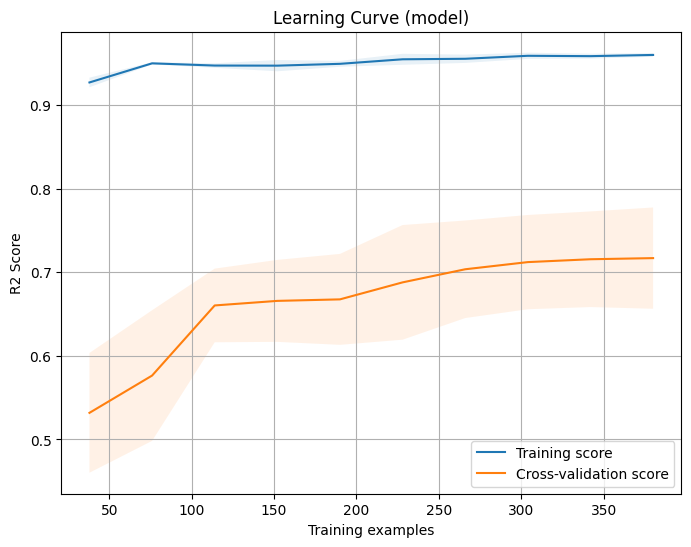

In [36]:
# prompt: learning curves for model and rf_model

import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Learning Curve for the model
train_sizes_model, train_scores_model, test_scores_model = learning_curve(
    estimator=model, X=X, y=y, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='r2'
)

train_mean_model = np.mean(train_scores_model, axis=1)
train_std_model = np.std(train_scores_model, axis=1)
test_mean_model = np.mean(test_scores_model, axis=1)
test_std_model = np.std(test_scores_model, axis=1)

plt.figure(figsize=(8, 6))
plt.plot(train_sizes_model, train_mean_model, label='Training score')
plt.fill_between(train_sizes_model, train_mean_model - train_std_model, train_mean_model + train_std_model, alpha=0.1)
plt.plot(train_sizes_model, test_mean_model, label='Cross-validation score')
plt.fill_between(train_sizes_model, test_mean_model - test_std_model, test_mean_model + test_std_model, alpha=0.1)
plt.xlabel('Training examples')
plt.ylabel('R2 Score')
plt.title('Learning Curve (model)')
plt.legend()
plt.grid(True)
plt.show()




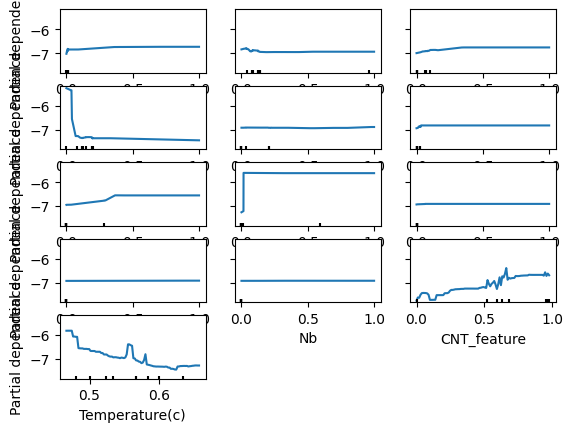

In [38]:
# prompt: partial deendence plots of rf_model

from sklearn.inspection import PartialDependenceDisplay

# Assuming 'rf_model' is your trained RandomForestRegressor and 'X' is your feature matrix
features = ['C', 'Mn', 'Si','Mo','Co','P','W','Al','Ti','Ce','Nb','CNT_feature','Temperature(c)']  # Replace with the features you want to plot

PartialDependenceDisplay.from_estimator(rf_model, X, features)
plt.show()


In [46]:
df

,Fe,C,Cr,Ni,Mn,Si,N,Mo,Co,P,...,Al,Ti,Ce,Nb,vol% sigma phase formed,Temperature(c),Onset Time(hrs),e_tot,e_tot_eV,CNT_feature
0,0.893077,0.0100,0.313549,0.092727,0.842226,0.000000,0.000000,0.000000,0.00,0.000000,...,0.514436,0.0000,0.0,0.0,0.004425,0.566667,0.038670,-706.756801,-4.411576e+21,0.965967
1,0.765769,0.0000,0.539220,0.303182,0.071646,0.000000,0.017778,0.780063,0.26,0.000000,...,0.000000,0.0000,0.0,0.0,0.037500,0.633333,0.000400,-705.656829,-4.404710e+21,0.964463
2,0.807692,0.0150,0.475671,0.272727,0.076220,0.166667,0.006667,0.553797,0.04,0.013333,...,0.013123,0.0625,0.0,0.0,0.000000,0.500000,0.004000,-365.582808,-2.281968e+21,0.000000
3,0.782436,0.0150,0.539220,0.303182,0.071646,0.000000,0.017778,0.780063,0.26,0.000000,...,0.000000,0.0000,0.0,0.0,0.025000,0.659773,0.000045,-708.162793,-4.420352e+21,0.967888
4,0.893077,0.0100,0.313549,0.092727,0.842226,0.000000,0.000000,0.000000,0.00,0.000000,...,0.514436,0.0000,0.0,0.0,0.023625,0.500000,0.241300,-698.354846,-4.359131e+21,0.954483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,0.765769,0.0000,0.539220,0.303182,0.071646,0.000000,0.017778,0.780063,0.26,0.000000,...,0.000000,0.0000,0.0,0.0,0.037500,0.600000,0.000600,-714.398002,-4.459272e+21,0.976410
569,0.769231,0.0150,0.517617,0.318182,0.076220,0.333333,0.008889,0.632911,0.00,0.000000,...,0.000000,0.0000,0.0,0.0,0.000000,0.600000,0.000004,-449.338741,-2.804772e+21,0.000000
570,0.856538,0.0105,0.456795,0.255909,0.117378,0.193333,0.006222,0.498418,0.00,0.018667,...,0.000000,0.0000,0.0,0.0,0.121000,0.566667,0.020000,-446.220656,-2.785309e+21,0.609876
571,0.782436,0.0150,0.539220,0.303182,0.071646,0.000000,0.017778,0.780063,0.26,0.000000,...,0.000000,0.0000,0.0,0.0,0.050000,0.601900,0.000044,-715.508369,-4.466203e+21,0.977928


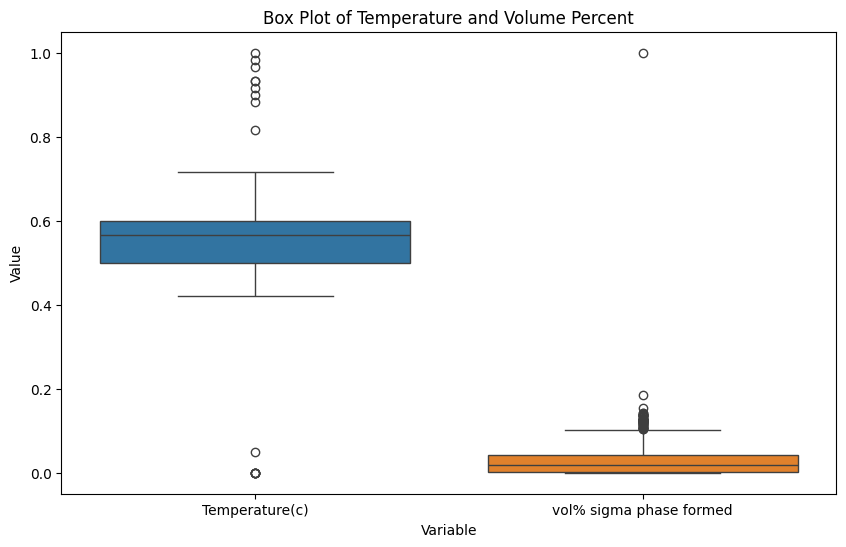

In [47]:
# prompt: box plot df[temperature,vol percent]

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame and it contains columns 'Temperature(c)' and 'vol percent'
# If 'vol percent' doesn't exist, replace it with the actual column name

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Temperature(c)', 'vol% sigma phase formed']]) #Replace 'vol percent' with your actual column name
plt.title('Box Plot of Temperature and Volume Percent')
plt.xlabel('Variable')
plt.ylabel('Value')
plt.show()


AttributeError: 'DataFrame' object has no attribute 'discribe'

In [49]:
# prompt: std deviation of df[vol%sigma phase

print(df['vol% sigma phase formed'].std())


0.05486851821725621


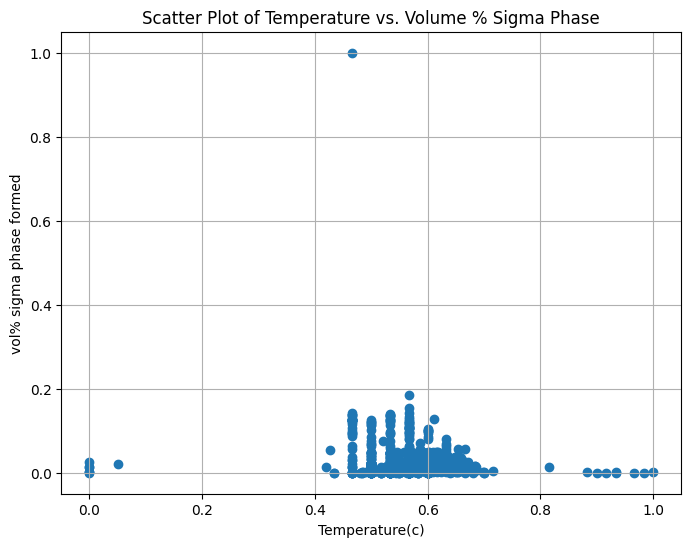

In [48]:
# prompt: scatter plot of df[temeperture and vol%sigma phase

import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and it contains columns 'Temperature(c)' and 'vol% sigma phase formed'
plt.figure(figsize=(8, 6))
plt.scatter(df['Temperature(c)'], df['vol% sigma phase formed'])
plt.xlabel('Temperature(c)')
plt.ylabel('vol% sigma phase formed')
plt.title('Scatter Plot of Temperature vs vol% sigma phase formed')
plt.grid(True)
plt.show()


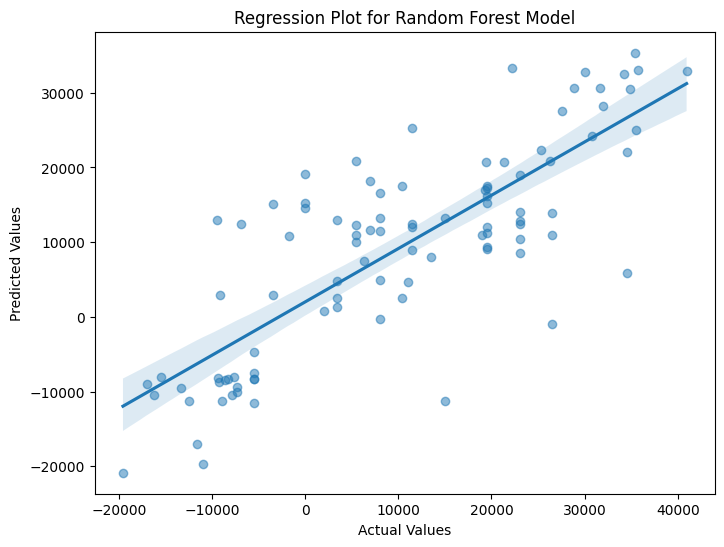

In [114]:
# prompt: regression plots for rf_model between actual and pridicted

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming y_test_orig and y_pred_orig are your actual and predicted values
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test_orig, y=y_pred_orig, scatter_kws={'alpha':0.5})
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Regression Plot for Random Forest Model')
plt.show()


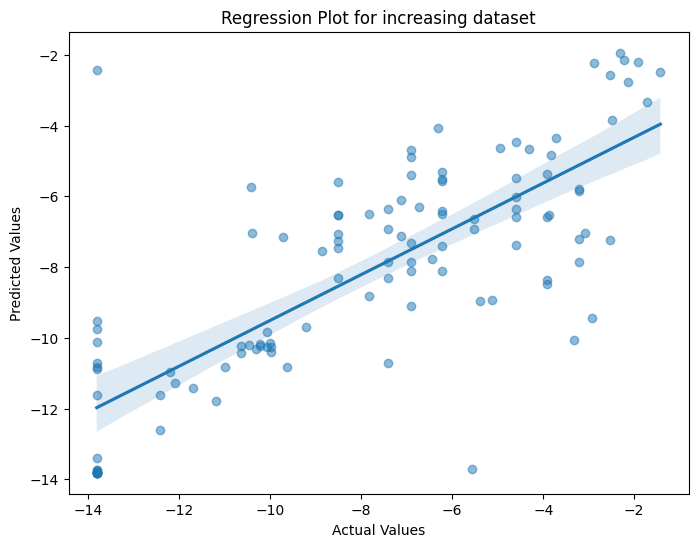

In [54]:
# prompt: regression plots for incresing dataset for rf model

import matplotlib.pyplot as plt
import seaborn as sns

# Assuming X_test, y_test, and y_pred are available from your model training

# Create a scatter plot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha': 0.5})  # Adjust alpha for transparency
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Regression Plot for increasing dataset")
plt.show()


In [52]:
df_dropped.describe()

,Fe,C,Cr,Ni,Mn,Si,N,Mo,Co,P,...,W,Al,Ti,Ce,Nb,vol% sigma phase formed,Temperature(c),Onset Time(hrs),CNT_feature,logt
count,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,...,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000,573.000000
mean,0.789108,0.024830,0.446614,0.251781,0.215897,0.096987,0.015297,0.485279,0.076604,0.012942,...,0.028730,0.087063,0.004276,0.055846,0.010006,0.033156,0.559130,0.026737,0.665269,-7.940766
std,0.171100,0.101605,0.128380,0.121890,0.289753,0.156177,0.072739,0.274888,0.136774,0.075857,...,0.097922,0.194363,0.043229,0.229826,0.088108,0.054869,0.094817,0.081139,0.348475,3.853465
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-13.815511
25%,0.778077,0.008000,0.412752,0.227273,0.071646,0.000000,0.006667,0.471519,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.002500,0.500000,0.000030,0.556172,-10.414313
50%,0.833333,0.010000,0.462878,0.259091,0.076220,0.000000,0.007911,0.504747,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.018850,0.566667,0.000400,0.687230,-7.824046
75%,0.871795,0.015000,0.538591,0.303182,0.121951,0.146667,0.017778,0.750000,0.260000,0.013333,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.042500,0.600000,0.010000,0.963313,-4.605170
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [53]:
df

,Fe,C,Cr,Ni,Mn,Si,N,Mo,Co,P,...,Al,Ti,Ce,Nb,vol% sigma phase formed,Temperature(c),Onset Time(hrs),e_tot,e_tot_eV,CNT_feature
0,0.893077,0.0100,0.313549,0.092727,0.842226,0.000000,0.000000,0.000000,0.00,0.000000,...,0.514436,0.0000,0.0,0.0,0.004425,0.566667,0.038670,-706.756801,-4.411576e+21,0.965967
1,0.765769,0.0000,0.539220,0.303182,0.071646,0.000000,0.017778,0.780063,0.26,0.000000,...,0.000000,0.0000,0.0,0.0,0.037500,0.633333,0.000400,-705.656829,-4.404710e+21,0.964463
2,0.807692,0.0150,0.475671,0.272727,0.076220,0.166667,0.006667,0.553797,0.04,0.013333,...,0.013123,0.0625,0.0,0.0,0.000000,0.500000,0.004000,-365.582808,-2.281968e+21,0.000000
3,0.782436,0.0150,0.539220,0.303182,0.071646,0.000000,0.017778,0.780063,0.26,0.000000,...,0.000000,0.0000,0.0,0.0,0.025000,0.659773,0.000045,-708.162793,-4.420352e+21,0.967888
4,0.893077,0.0100,0.313549,0.092727,0.842226,0.000000,0.000000,0.000000,0.00,0.000000,...,0.514436,0.0000,0.0,0.0,0.023625,0.500000,0.241300,-698.354846,-4.359131e+21,0.954483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,0.765769,0.0000,0.539220,0.303182,0.071646,0.000000,0.017778,0.780063,0.26,0.000000,...,0.000000,0.0000,0.0,0.0,0.037500,0.600000,0.000600,-714.398002,-4.459272e+21,0.976410
569,0.769231,0.0150,0.517617,0.318182,0.076220,0.333333,0.008889,0.632911,0.00,0.000000,...,0.000000,0.0000,0.0,0.0,0.000000,0.600000,0.000004,-449.338741,-2.804772e+21,0.000000
570,0.856538,0.0105,0.456795,0.255909,0.117378,0.193333,0.006222,0.498418,0.00,0.018667,...,0.000000,0.0000,0.0,0.0,0.121000,0.566667,0.020000,-446.220656,-2.785309e+21,0.609876
571,0.782436,0.0150,0.539220,0.303182,0.071646,0.000000,0.017778,0.780063,0.26,0.000000,...,0.000000,0.0000,0.0,0.0,0.050000,0.601900,0.000044,-715.508369,-4.466203e+21,0.977928


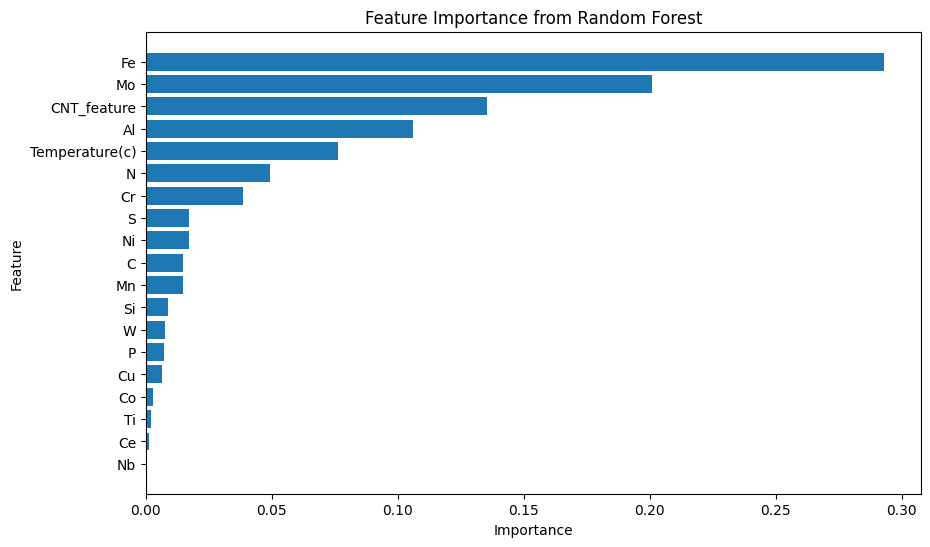

In [115]:
# prompt: rf_model feature importance plots

import matplotlib.pyplot as plt

# Get feature importance
importance = rf_model.feature_importances_

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance from Random Forest')
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()


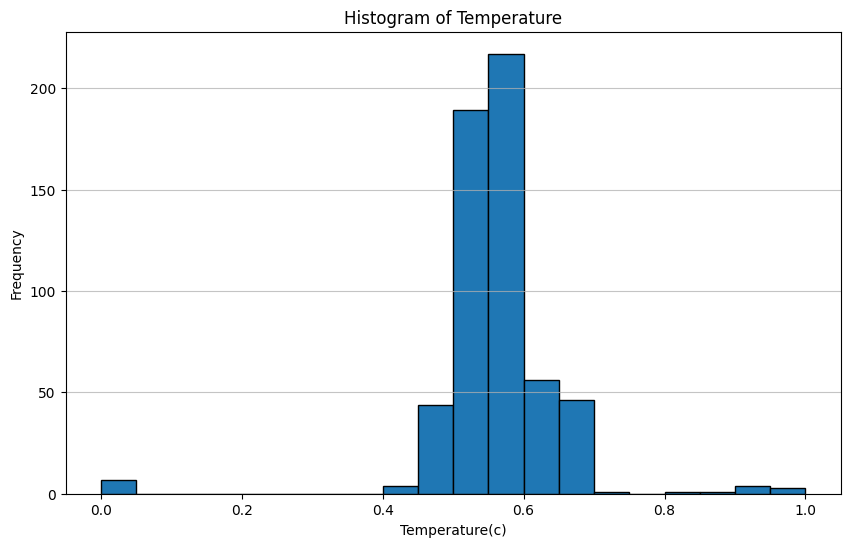

In [56]:
# prompt: histogram for df[temperature]

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(df['Temperature(c)'], bins=20, edgecolor='black')  # Adjust 'bins' as needed
plt.xlabel('Temperature(c)')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [116]:
R2_test = r2_score(y_test, y_pred)
RMSE_test = np.sqrt(mean_squared_error(y_test, y_pred))

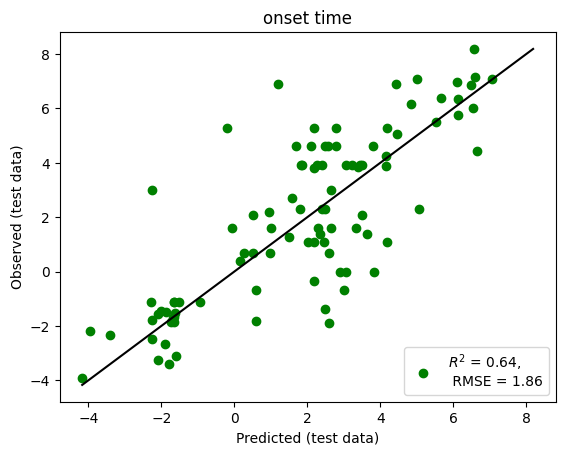

In [117]:
x_tmp = np.linspace(min(min(y_pred), min(y_test)), max(max(y_pred), max(y_test)), 100)
y_tmp = np.linspace(min(min(y_pred), min(y_test)), max(max(y_pred), max(y_test)), 100)

plt.scatter(y_pred, y_test, c='g', label='$R^2$ = ' + str(round(R2_test, 2)) + ',\n RMSE = ' + str(round(RMSE_test, 2)))
plt.xlabel('Predicted (test data)')
plt.ylabel('Observed (test data)')
plt.plot(x_tmp, y_tmp, c='k')

plt.title('onset time')
plt.legend(loc=4)
plt.show()

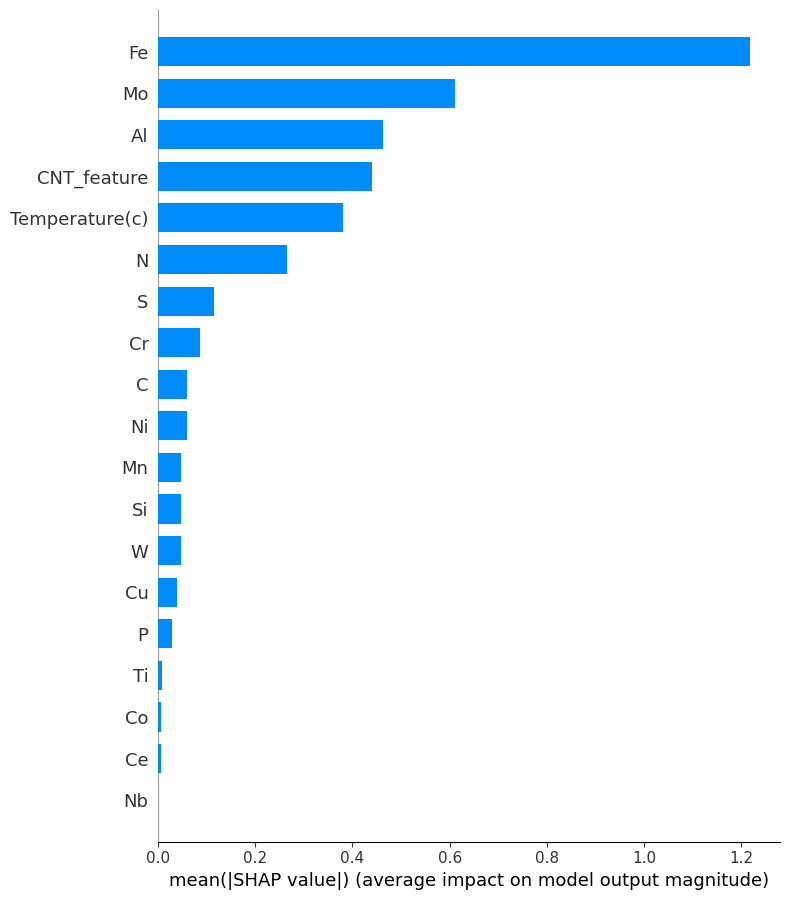

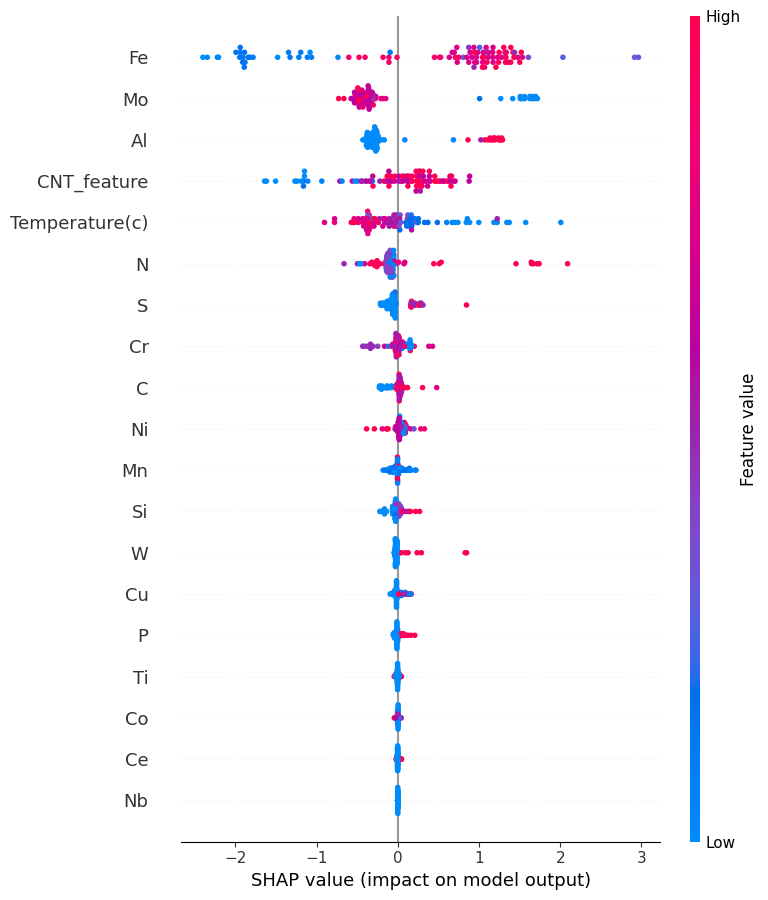

In [40]:
# prompt: SHAP values of rf_model

import shap

# Assuming rf_model and X_test are defined from your previous code
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
shap.summary_plot(shap_values, X_test, plot_type="bar")
shap.summary_plot(shap_values, X_test)
